In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("data-train.csv",index_col=0)
Y_train = X_train.sales
X_train = X_train.drop(['sales'],axis=1)

In [4]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [5]:
Model_1 = BaggingRegressor()

# 2. Setup Pipeline

In [6]:

RG = Model_1

In [7]:

pipe = Pipeline(steps=[("RG",RG)])

In [8]:
param_grid = {
    "RG__bootstrap":[True,False],
    "RG__bootstrap_features":[True,False],
    "RG__n_estimators":[10,100,1000]
}

# 3. Setup GridSearch

In [9]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [10]:
search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=10, estimator=Pipeline(steps=[('RG', BaggingRegressor())]),
             n_jobs=-1,
             param_grid={'RG__bootstrap': [True, False],
                         'RG__bootstrap_features': [True, False],
                         'RG__n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [11]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-481.093):
{'RG__bootstrap': True, 'RG__bootstrap_features': False, 'RG__n_estimators': 1000}


In [12]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__bootstrap,param_RG__bootstrap_features,param_RG__n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,28.859204,1.229884,0.209538,0.008938,True,False,1000,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-152.549298,-267.282827,...,-639.611242,-1162.874789,-151.121683,-379.218314,-407.107166,-574.722670,-271.946604,-481.092610,304.210280,1
3,0.288479,0.028484,0.006255,0.002519,True,False,10,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-171.038664,-329.525862,...,-515.588233,-937.982078,-178.949264,-522.684156,-465.436104,-553.904242,-279.184026,-481.443401,247.397412,2
4,3.048149,0.515739,0.027826,0.006902,True,False,100,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-149.083238,-277.877438,...,-631.558134,-1154.208220,-153.517583,-390.988433,-403.554445,-571.634118,-271.422534,-484.596874,305.134079,3
2,31.953388,0.909777,0.271474,0.059793,True,True,1000,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-180.224355,-249.594944,...,-773.886299,-1467.183015,-224.327795,-490.663597,-353.047073,-651.789580,-268.518951,-523.403929,367.401013,4
8,46.686362,1.561564,0.258225,0.027440,False,True,1000,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-168.786379,-248.852799,...,-409.513367,-1744.169109,-240.045952,-445.948821,-395.436178,-600.155290,-347.341001,-529.016712,432.589679,5
7,4.681234,0.279739,0.026170,0.008432,False,True,100,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-159.128174,-256.529768,...,-365.684016,-1709.342815,-268.441690,-459.267679,-386.013802,-617.971354,-395.642360,-534.544387,422.952584,6
1,3.961128,0.904156,0.029497,0.018997,True,True,100,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-175.690776,-284.228055,...,-805.873052,-1453.578470,-203.844348,-722.492570,-378.304313,-688.109274,-280.663689,-550.095547,369.471220,7
0,0.656956,0.085724,0.009096,0.006675,True,True,10,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-182.248922,-382.596681,...,-736.026422,-1345.257143,-310.228312,-596.781255,-417.797446,-686.154978,-358.358485,-585.386822,321.463621,8
6,0.475387,0.035308,0.006515,0.005085,False,True,10,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-192.198018,-328.831638,...,-764.883578,-1673.753074,-397.182727,-707.493680,-443.119654,-592.425368,-534.117186,-649.295515,392.991200,9
10,4.514515,0.430216,0.022004,0.006595,False,False,100,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-375.006722,-334.300472,...,-790.423486,-1965.114605,-357.476331,-665.839925,-485.394536,-630.830939,-783.268770,-778.386331,494.729403,10


# 4. Best Hyperparameter

In [13]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__bootstrap': True, 'RG__bootstrap_features': False, 'RG__n_estimators': 1000}


# 5. Evaluate Model

In [14]:
best_boot = parms.iloc[0][0]['RG__bootstrap']
best_boot_feat = parms.iloc[0][0]['RG__bootstrap_features']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [15]:
Model_2 = BaggingRegressor(bootstrap=best_boot,bootstrap_features=best_boot_feat,n_estimators=best_n_est)

In [16]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [17]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

BaggingRegressor(n_estimators=1000)

In [18]:
MSE(RG1.predict(X_test1),Y_test1)

316.7954317300216

In [19]:
result = pd.DataFrame(Y_test1)

In [20]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [21]:
MSE(result["sales"],result["Predicted_sales"])

316.7954317300216

# 5.1 Model using $log(Sales)$

In [60]:
Model_3 = BaggingRegressor(bootstrap=best_boot,bootstrap_features=best_boot_feat,n_estimators=best_n_est)

In [61]:
OY_train = pd.read_csv("A_log_sales_train.csv",index_col=0)

In [62]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [63]:
RG2 = Model_3
RG2.fit(X_train2,Y_train2.values.ravel())

BaggingRegressor(n_estimators=1000)

In [64]:
MSE(np.exp(RG2.predict(X_test2)),np.exp(Y_test2))

288.80310943577155

Interestingly, for Gradient boosting models that do not use PCA, using the unmodified sales as response yields better result

# 6. Inventory Decision

In [22]:
residual = result['sales']-result['Predicted_sales']

In [23]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [24]:
import scipy.stats as sct

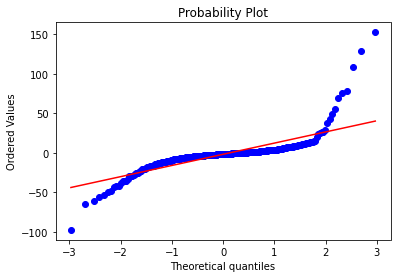

In [25]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [26]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

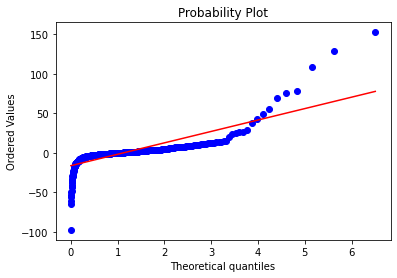

In [27]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [28]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

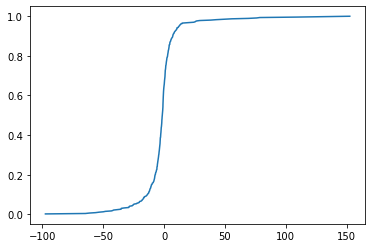

In [29]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

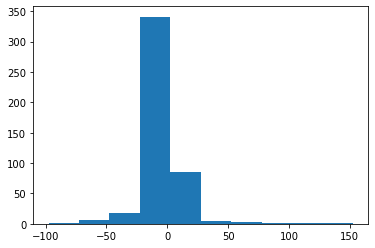

In [30]:
plt.hist(Sample)
plt.show()

In [31]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [32]:
offset = inv(Sample,jumps,2/3)
offset

0.22799999999999998

In [33]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [34]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [56]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

59968.0

In [35]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [57]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

59968.0

In [36]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

53484.0

In [37]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

59964.0

In [38]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

60020.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [48]:
Model_4 = BaggingRegressor(bootstrap=best_boot,bootstrap_features=best_boot_feat,n_estimators=best_n_est)

In [49]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [50]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.732940,0.708149,0.583722,0.629442,0.560032,0.720959,0.690410,0.662099,0.605762,0.664234,0.655775
Exponential,0.780302,0.753933,0.717470,0.747897,0.729654,0.771358,0.757393,0.726106,0.712330,0.739435,0.743588
Empirical,0.786584,0.750221,0.719457,0.740086,0.712651,0.772588,0.745466,0.725239,0.716267,0.740012,0.740857


In [51]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,30332.0,32048.0,27024.0,29332.0,27800.0,28152.0,33808.0,30536.0,27080.0,27664.0,29377.6,2162.407695
Exponential,32292.0,34120.0,33216.0,34852.0,36220.0,30120.0,37088.0,33488.0,31844.0,30796.0,33403.6,2130.960685
Empirical,32552.0,33952.0,33308.0,34488.0,35376.0,30168.0,36504.0,33448.0,32020.0,30820.0,33263.6,1859.523767
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [52]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,150.123332
Dataset_2,262.217544
Dataset_3,782.378600
Dataset_4,649.703023
Dataset_5,1171.525546
Dataset_6,153.471427
Dataset_7,375.632206
Dataset_8,404.716438
Dataset_9,564.749194
Dataset_10,272.309605


In [53]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  478.6826913657075


In [54]:
profit_table.to_csv(".\\Model_Selection_Result\\4.4B_Bagging(No_PCA).csv")

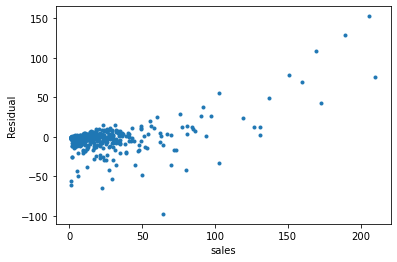

In [55]:
plt.xlabel("sales")
plt.ylabel("Residual")
plt.plot(result['sales'],residual,".")

In [58]:
name = "4.4B_Bagging(No_PCA).csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [59]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")